

# Project: Investigate the No Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analyzing data associated with the medical appointments in Brazil and is foucsed on the question of whether or not patients showed up for their appointment. In particular, we will be interested in finding the trends among patiends with different health conditions and other factors. We will be doing data wrangling, data cleaning, exploratory data analysis, and draw a conclusion. 

#### Import all of the packages that we will need for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling



### General Properties

#### Load dataset and print out the first 5 rows of the dataset

In [3]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Check the nstructure of the dataset - 14 rows and 110527 columns

In [4]:
df.shape

(110527, 14)

#### A description of the dataset - notice something odd about the dataset are: min of Age is -1, max of Handcap is 4

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Look for instances of missing or possibly errant data - no missing data in our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Perform histogram on variables -  except age (not a normal distribution), appointment ID and patient ID, all other variables are taking the value of 0 or 1

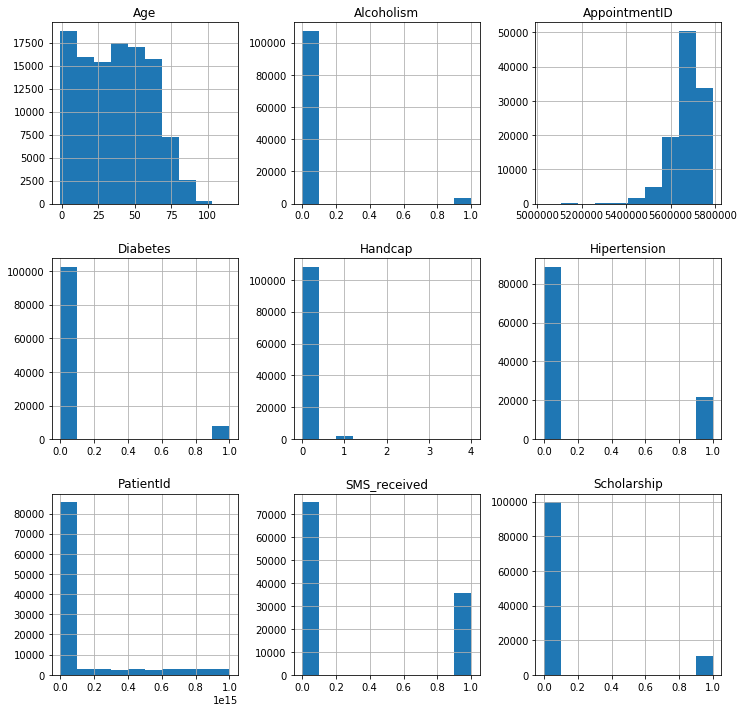

In [7]:
df.hist(figsize=(12,12));



### Data Cleaning (Replace this with more specific notes!)

#### Trim and clean the data by dropping the columns that we will not be using - PatientID, AppointmentID and Neighourhood

In [8]:
df.drop(['PatientId','AppointmentID','Neighbourhood'],axis=1, inplace=True)

In [9]:
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No


#### Drop the row where the Age is -1

In [10]:
df.query('Age == -1')

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,0,0,0,0,0,0,No


In [11]:
df.drop(index=99832, axis=1, inplace=True) 

#### Double check on the -1 Age row - nothing shows up

In [12]:
df.query('Age==-1')

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Drop the row where Handcap is 4

In [13]:
df.query('Handcap==4')

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
91820,M,2016-06-08T15:14:00Z,2016-06-08T00:00:00Z,15,0,0,0,0,4,0,No
98538,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19,0,0,0,0,4,0,No
104268,F,2016-05-13T15:01:17Z,2016-06-02T00:00:00Z,9,0,0,0,0,4,1,Yes


In [14]:
df.drop(index={91820,98538,104268}, axis=1, inplace=True) 

#### Double check the rows Handcap equals 4 - nothing shows up

In [15]:
df.query('Handcap==4')

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Get dummy variable for the column No-show - 0 when they showed up at the medical appointment, and 1 when they didn't show up at the appointment

In [16]:
dummies = pd.get_dummies(df['No-show'],drop_first=True)
df=pd.concat([df,dummies],axis=1)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Yes
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No,0


#### Drop the orignial No-show column and rename the dummy variable as No_show

In [17]:
df.drop('No-show',axis=1, inplace=True)

In [18]:
df.rename(columns={'Yes':'No_show'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - Does Age show any pattens among patients who showed up and didn't show up?

#### FIrst, let's find out how many patients showed up and didn't show up for their appointment

In [19]:
df.groupby('No_show').count().Age

No_show
0    88205
1    22318
Name: Age, dtype: int64

#### Find out the percentage of patients showed up

In [20]:
88205/(88205+22318)

0.7980691801706432

#### Split the data into 2 parts based on whether they showed up or not

In [21]:
show=df.query('No_show==0')
no_show=df.query('No_show==1')

#### Find out the mean Age for each group of parients - the average age of patients who showed up was 37 and average age of parients who didn't show up was 34

In [22]:
print(show['Age'].mean())
no_show['Age'].mean()

37.79097556827844


34.31880096782866

#### Now let's show the age distribution using histogram

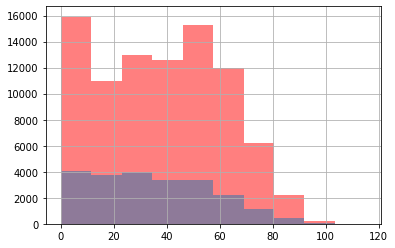

In [23]:
show['Age'].hist(alpha=0.5, color='r', label='show')
no_show['Age'].hist(alpha=0.5,label='no show');

Conclusion: There are significantly more patients who showed up to their medical appointments than who didn't. Patients who showed up are older, on average, than patients who didn't show up. Among the ones who didn't show up, majority patient were less than 60 years old; among the ones who showed up, patients who were less than 10 years-old and people who were in their 50s had the highest show-up rate.

### Research Question 2  - Patients with what health condition had the most no-show-up?

#### Count the number of no-show patients who had Hipertension, Diabets and Alcoholism, and plot them out using bar charts

In [24]:
df.groupby('Hipertension').No_show.count()

Hipertension
0    88722
1    21801
Name: No_show, dtype: int64

In [25]:
nohip = df.groupby('Hipertension').No_show.count()[0]

In [26]:
hip = df.groupby('Hipertension').No_show.count()[1]

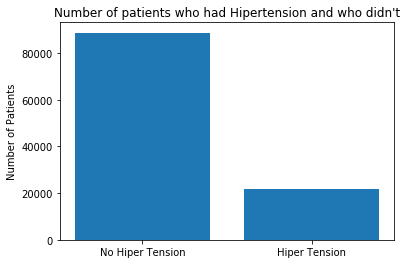

In [27]:
plt.bar(["No Hiper Tension","Hiper Tension"],[nohip, hip])
plt.title("Number of patients who had Hipertension and who didn't")
plt.ylabel("Number of Patients");

#### Do the same for the variable Diabetes and Alcoholism

In [28]:
df.groupby('Diabetes').No_show.count()

Diabetes
0    102580
1      7943
Name: No_show, dtype: int64

In [29]:
nodia = df.groupby('Diabetes').No_show.count()[0]

In [30]:
dia =df.groupby('Diabetes').No_show.count()[1]

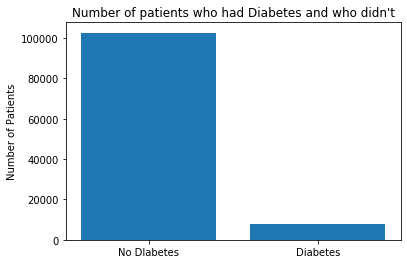

In [31]:
plt.bar(["No DIabetes","Diabetes"],[nodia, dia])
plt.title("Number of patients who had Diabetes and who didn't")
plt.ylabel("Number of Patients");

In [32]:
df.groupby('Alcoholism').No_show.count()

Alcoholism
0    107163
1      3360
Name: No_show, dtype: int64

In [33]:
noalcho = df.groupby('Diabetes').No_show.count()[0]

In [34]:
alcho =df.groupby('Diabetes').No_show.count()[1]

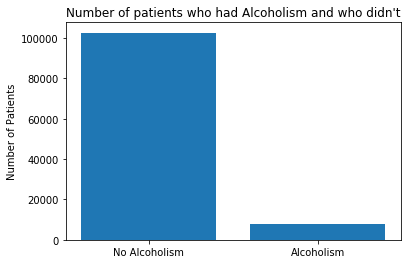

In [35]:
plt.bar(["No Alcoholism","Alcoholism"],[noalcho, alcho])
plt.title("Number of patients who had Alcoholism and who didn't")
plt.ylabel("Number of Patients");

Conclusion: Among the 3 health conditions we examined, patients with Hipertension had the highest number of no-shows compared to patients with other health conditions. 

### Research Question 3  - Does SMS help to increase the show-up?

#### FInd out among the patients who received SMS, how many showed up and how many didn't

In [36]:
sms=df[df['SMS_received']==1]

Calculate the show-up rate when patients received a SMS - 72%

In [37]:
sms[sms['No_show']==0].shape[0]/sms.shape[0]*100

72.42749640652744

#### FInd out among the patients who didn't received SMS, how many showed up and how many didn't

In [38]:
nosms=df[df['SMS_received']==0]

Calculate the show-up rate when patients didn't receive a SMS - 83%

In [39]:
nosms[nosms['No_show']==0].shape[0]/nosms.shape[0]*100

83.29602089496548

Conclusion: Interestingly, it turned out the sending a SMS to patients led to a lower low-up rate based on our dataset.

<a id='conclusions'></a>
## Conclusions

Overall, the dataset we examined in this practise showed that the majority patients showed up at their medical appointment, with a show-up rate of 80%.
Among them, patients who were at the age of 60 or less are observied to be more likely to show up in their medical appointment. Among the 3 health conditions we examined, patients with Hipertension had the highest number of no-shows compared to patients with other health conditions. And sending a SMS to patients led to a lower low-up rate based on our dataset.

However, there are many limitations due to the nature of the dataset. For exmaple, the data is highly inbalanced, distribution of the variable Age is left skewed, all other variables are binary with 1 being the majority values. 





